In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meta-kaggle-hackathon/README
/kaggle/input/meta-kaggle/KernelTags.csv
/kaggle/input/meta-kaggle/ModelVariations.csv
/kaggle/input/meta-kaggle/KernelVersionCompetitionSources.csv
/kaggle/input/meta-kaggle/Datasets.csv
/kaggle/input/meta-kaggle/KernelVersionKernelSources.csv
/kaggle/input/meta-kaggle/KernelVotes.csv
/kaggle/input/meta-kaggle/Submissions.csv
/kaggle/input/meta-kaggle/KernelLanguages.csv
/kaggle/input/meta-kaggle/Users.csv
/kaggle/input/meta-kaggle/ForumMessageVotes.csv
/kaggle/input/meta-kaggle/Competitions.csv
/kaggle/input/meta-kaggle/DatasetTaskSubmissions.csv
/kaggle/input/meta-kaggle/UserAchievements.csv
/kaggle/input/meta-kaggle/UserOrganizations.csv
/kaggle/input/meta-kaggle/Teams.csv
/kaggle/input/meta-kaggle/UserFollowers.csv
/kaggle/input/meta-kaggle/CompetitionTags.csv
/kaggle/input/meta-kaggle/Kernels.csv
/kaggle/input/meta-kaggle/Organizations.csv
/kaggle/input/meta-kaggle/Datasources.csv
/kaggle/input/meta-kaggle/ModelVersions.csv
/kaggle/input

HoJeeeeee

In [10]:
# Bibliotecas úteis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Leitura dos datasets principais
users = pd.read_csv('/kaggle/input/meta-kaggle/Users.csv')
competitions = pd.read_csv('/kaggle/input/meta-kaggle/Competitions.csv')
kernels = pd.read_csv('/kaggle/input/meta-kaggle/Kernels.csv')
tags = pd.read_csv('/kaggle/input/meta-kaggle/Tags.csv')
competition_tags = pd.read_csv('/kaggle/input/meta-kaggle/CompetitionTags.csv')


In [11]:
print(users.columns)

Index(['Id', 'UserName', 'DisplayName', 'RegisterDate', 'PerformanceTier',
       'Country', 'LocationSharingOptOut'],
      dtype='object')


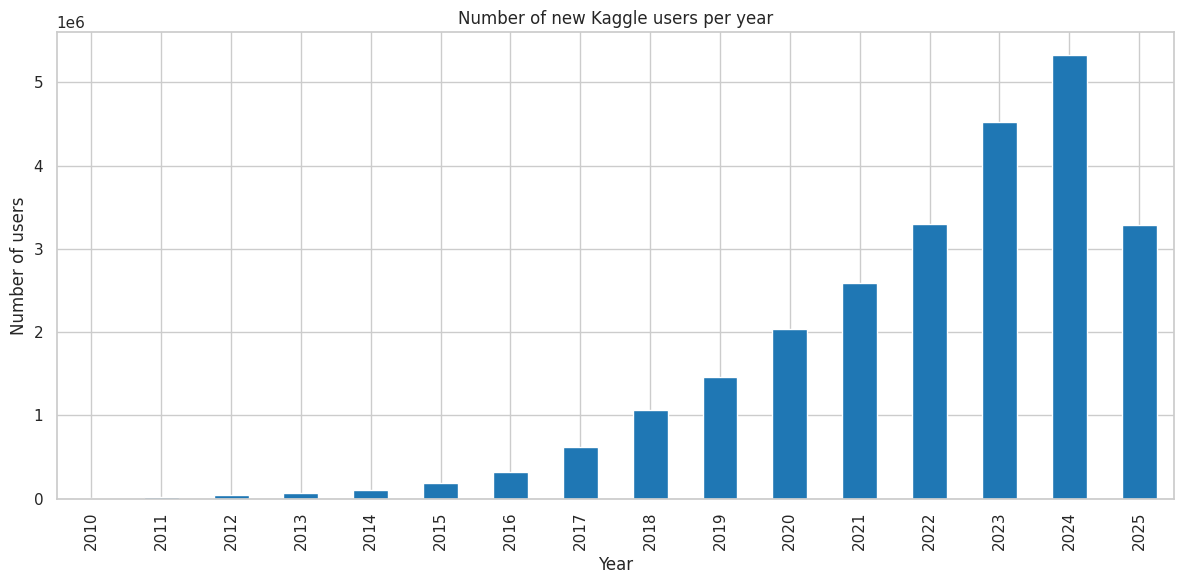

In [30]:
# Converter a data de registro
users['RegisterDate'] = pd.to_datetime(users['RegisterDate'], errors='coerce')
users['Year'] = users['RegisterDate'].dt.year

# Agrupar por ano de registro
users_per_year = users.groupby('Year').size()

# Gráfico
users_per_year.plot(kind='bar', color='#1f77b4')
plt.title("Number of new Kaggle users per year")
plt.xlabel("Year")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()

In [13]:
print(competition_tags.columns)


Index(['Id', 'CompetitionId', 'TagId'], dtype='object')


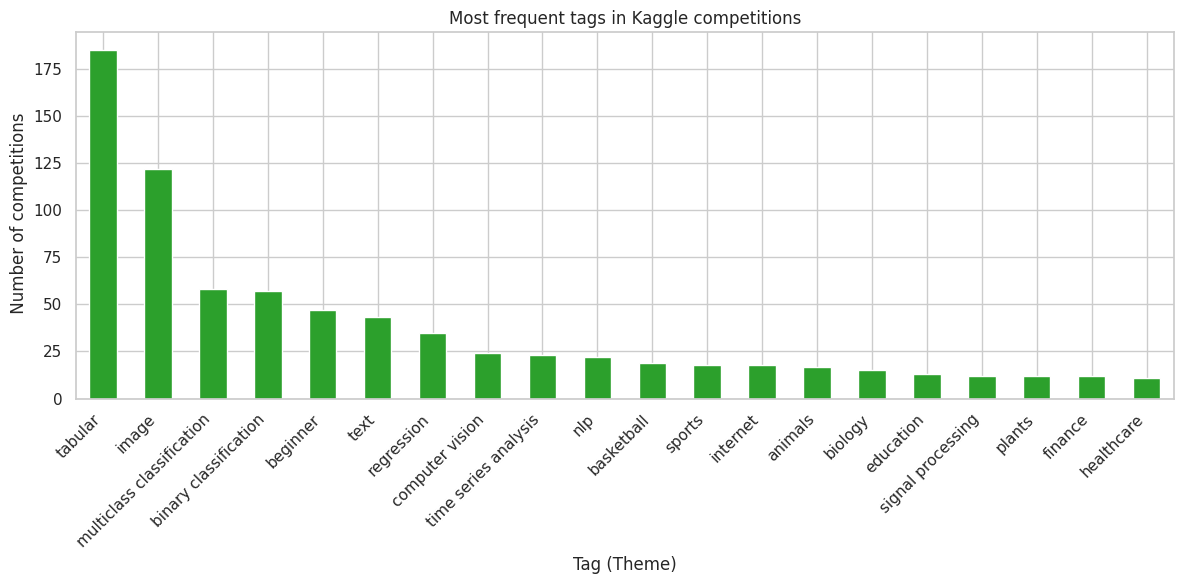

In [14]:
# Renomear coluna 'Id' de tags para 'TagId'
tags_renamed = tags.rename(columns={'Id': 'TagId'})

# Unir tags com competition_tags
comp_tags = competition_tags.merge(tags_renamed, on='TagId', how='left')

# Contar as tags mais frequentes
tag_counts = comp_tags['Name'].value_counts().head(20)

# Gráfico
tag_counts.plot(kind='bar', color='#2ca02c')
plt.title("Most frequent tags in Kaggle competitions")
plt.xlabel("Tag (Theme)")
plt.ylabel(" Number of competitions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
print(tags.columns)


Index(['Id', 'ParentTagId', 'Name', 'Slug', 'FullPath', 'Description',
       'DatasetCount', 'CompetitionCount', 'KernelCount'],
      dtype='object')


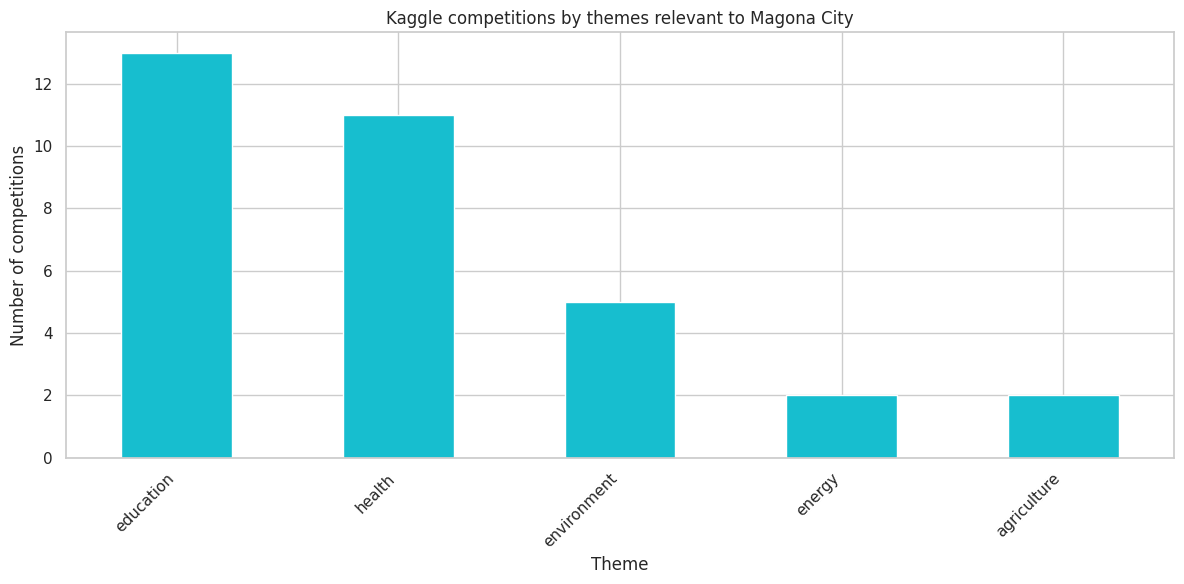

In [16]:
# Lista de temas relevantes para o projeto Magona City
temas_magona = ['education', 'sustainability', 'climate', 'energy', 'health', 'agriculture', 'environment']

# Garantir que o campo 'Name' esteja em minúsculas para comparação segura
comp_tags['NameLower'] = comp_tags['Name'].str.lower()

# Filtrar apenas as tags que estão na lista de temas
temas_filtrados = comp_tags[comp_tags['NameLower'].isin(temas_magona)]

# Contar por tema
temas_filtrados['NameLower'].value_counts().plot(kind='bar', color='#17becf')
plt.title("Kaggle competitions by themes relevant to Magona City")
plt.xlabel("Theme")
plt.ylabel("Number of competitions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [17]:
print(temas_filtrados.columns)

Index(['Id', 'CompetitionId', 'TagId', 'ParentTagId', 'Name', 'Slug',
       'FullPath', 'Description', 'DatasetCount', 'CompetitionCount',
       'KernelCount', 'NameLower'],
      dtype='object')


In [18]:
print(competitions.columns)

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes',
       'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions', 'LicenseName', 'Overview',
       'Rules', 'DatasetDescription', 'TotalCompressedBytes',
       'TotalUncompressedBytes', 'ValidationSetName', 'ValidationSetValu

In [19]:
# Fazer merge entre temas filtrados e competições pelo Id da competição
comp_detalhado = temas_filtrados.merge(
    competitions,
    left_on='CompetitionId',
    right_on='Id',
    how='left'
)

# Selecionar colunas importantes para a análise
comp_detalhado = comp_detalhado[[
    'Name',              
    'Title',             
    'EnabledDate',        
    'RewardQuantity',    
    'RewardType'         
]]


comp_detalhado.columns = [
    'Tag',
    'Competition Title',
    'Start Date',
    'Award Value',
    'Award Type'
]

# Ordenar por data da competição, do mais recente para o mais antigo
comp_detalhado = comp_detalhado.sort_values(by='Start Date', ascending=False)

# Mostrar as 15 primeiras competições
comp_detalhado.head(15)

,Tag,Competition Title,Start Date,Award Value,Award Type
13,education,Learning Equality - Curriculum Recommendations,12/15/2022 14:49:25,55000.0,USD
14,health,1st and Future - Player Contact Detection,12/05/2022 20:38:03,100000.0,USD
5,health,HuBMAP - Hacking the Kidney,11/16/2020 22:11:08,60000.0,USD
25,health,SenNet + HOA - Hacking the Human Vasculature i...,11/07/2023 17:26:14,80000.0,USD
21,energy,Enefit - Predict Energy Behavior of Prosumers,11/02/2023 21:47:52,50000.0,USD
26,education,LLM - Detect AI Generated Text,10/31/2023 17:55:41,110000.0,USD
24,health,Binary Prediction of Smoker Status using Bio-S...,10/24/2023 00:02:02,0.0,Swag
1,education,2019 Data Science Bowl,10/24/2019 12:59:18,160000.0,USD
0,energy,ASHRAE - Great Energy Predictor III,10/15/2019 18:26:22,25000.0,USD
3,education,Riiid Answer Correctness Prediction,10/05/2020 17:24:56,100000.0,USD


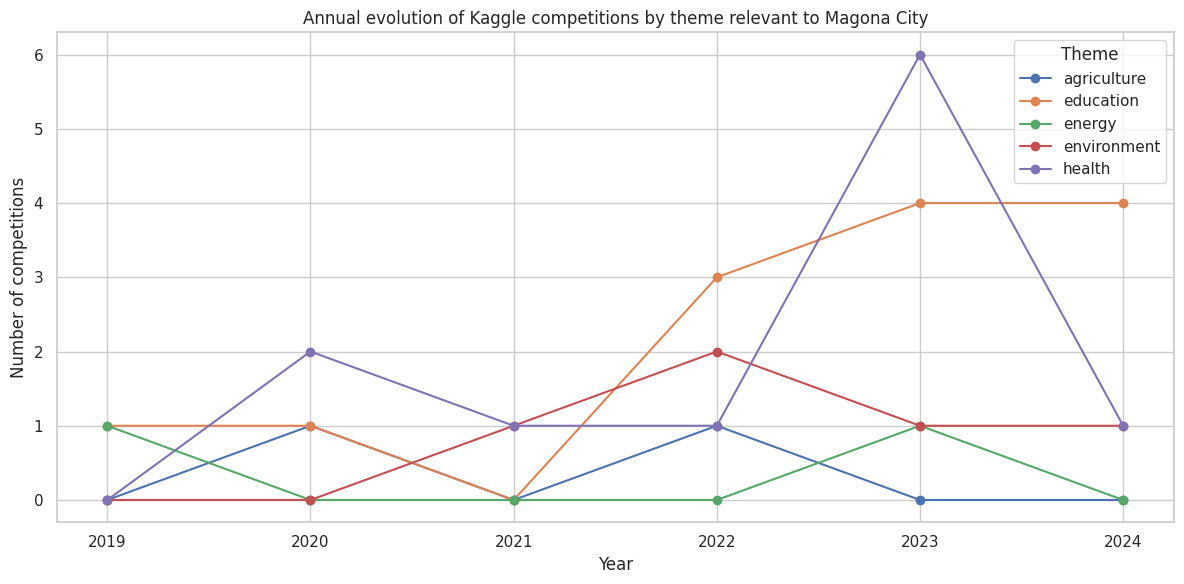

In [21]:
# Garantir que a data está no formato datetime
comp_detalhado['Start Date'] = pd.to_datetime(comp_detalhado['Start Date'], errors='coerce')

# Extrair ano
comp_detalhado['Year'] = comp_detalhado['Start Date'].dt.year

# Contar número de competições por ano e tema
evolucao_ano_tema = comp_detalhado.groupby(['Year', 'Tag']).size().unstack(fill_value=0)

# Plotar gráfico de linha para cada tema
evolucao_ano_tema.plot(marker='o')
plt.title('Annual evolution of Kaggle competitions by theme relevant to Magona City')
plt.xlabel('Year')
plt.ylabel('Number of competitions')
plt.legend(title='Theme')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/meta-kaggle")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/meta-kaggle


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho correto para o arquivo
competitions_path = "/kaggle/input/meta-kaggle/Competitions.csv"

# Carregar dados das competições
competitions = pd.read_csv(competitions_path)

# Ver as primeiras linhas para garantir que carregou corretamente
competitions.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,Rules,DatasetDescription,TotalCompressedBytes,TotalUncompressedBytes,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p><b>Data provided<b...,800614.0,400307.0,NaN,NaN,False,False,NaN,1
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1.0,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<div><div><div>These ...,2141503.0,1095096.0,NaN,NaN,False,False,NaN,1
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,3094129.0,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,10401.0,10401.0,NaN,NaN,False,False,NaN,1
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4.0,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,"# Dataset Description\n\n<div><span class=""App...",14718207.0,14718207.0,NaN,NaN,False,False,NaN,1
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3.0,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,NaN,NaN,NaN,NaN,False,False,NaN,1


In [24]:
# Converter datas
competitions['EnabledDate'] = pd.to_datetime(competitions['EnabledDate'], errors='coerce')
competitions['Year'] = competitions['EnabledDate'].dt.year

# Palavras-chave relacionadas ao Smart City Lab
keywords = ['city', 'urban', 'traffic', 'irrigation', 'energy', 'agriculture',
            'sustainability', 'climate', 'iot', 'smart', 'robot', 'autonomous']

# Marcar competições relevantes
def match_keywords(title):
    title = str(title).lower()
    return any(kw in title for kw in keywords)

competitions['Relevant'] = competitions['Title'].apply(match_keywords)


/tmp/ipykernel_35/965499108.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


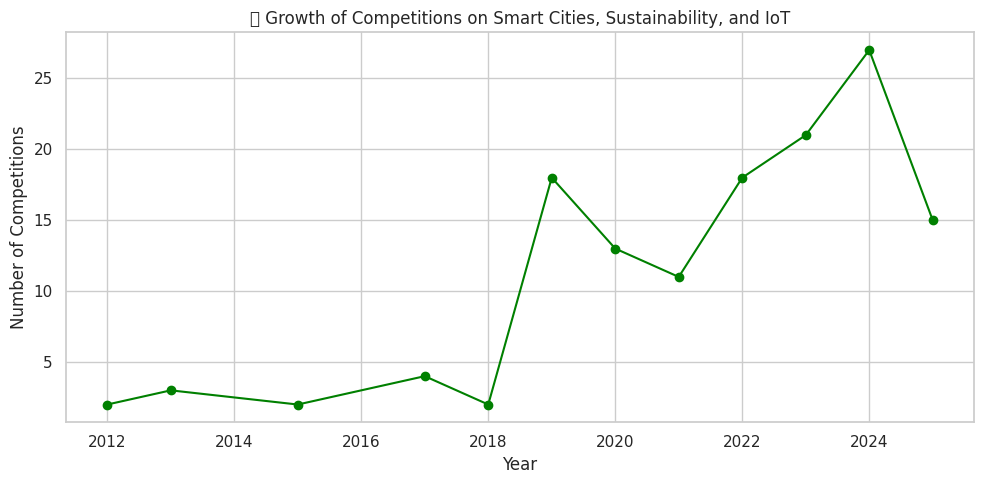

In [25]:
# Contagem por ano
trend_df = competitions[competitions['Relevant']].groupby('Year').size().reset_index(name='RelevantCompetitions')

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(trend_df['Year'], trend_df['RelevantCompetitions'], marker='o', color='green')
plt.title('📊 Growth of Competitions on Smart Cities, Sustainability, and IoT')
plt.xlabel('Year')
plt.ylabel('Number of Competitions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
relevant_titles = competitions[competitions['Relevant']][['Title', 'EnabledDate', 'TotalTeams']]
relevant_titles = relevant_titles.sort_values(by='TotalTeams', ascending=False)

# Top 10 competições mais populares
relevant_titles.head(10)


,Title,EnabledDate,TotalTeams
987,ASHRAE - Great Energy Predictor III,2019-10-15 18:26:22,3591
1369,Jigsaw Unintended Bias in Toxicity Classification,2019-03-29 17:23:55,2634
7099,Enefit - Predict Energy Behavior of Prosumers,2023-11-02 21:47:52,2293
1018,New York City Taxi Fare Prediction,2018-07-25 02:18:34,1483
1493,CareerCon 2019 - Help Navigate Robots,2019-03-14 02:50:23,1443
551,New York City Taxi Trip Duration,2017-07-20 15:26:36,1254
3180,Google Research Football with Manchester City ...,2020-09-28 17:35:54,1138
230,Facebook Recruiting IV: Human or Robot?,2015-04-27 16:40:01,983
2721,Lyft Motion Prediction for Autonomous Vehicles,2020-08-24 20:13:59,935
986,Peking University/Baidu - Autonomous Driving,2019-10-22 19:57:07,864


In [27]:
# Gerar lista de anos e valores
years = trend_df['Year'].tolist()
values = trend_df['RelevantCompetitions'].tolist()

# Criar array no estilo Arduino
arduino_array = ", ".join([f"{{{y}, {v}}}" for y, v in zip(years, values)])
print(f"int metaData[][2] = {{ {arduino_array} }};")

int metaData[][2] = { {2012, 2}, {2013, 3}, {2015, 2}, {2017, 4}, {2018, 2}, {2019, 18}, {2020, 13}, {2021, 11}, {2022, 18}, {2023, 21}, {2024, 27}, {2025, 15} };
